In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
from astropy import units as u
from astropy import constants as const

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [3]:
sys.path.append("..")

In [10]:
import py21cmfast as p21c

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [4]:
ddir = "/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs"

In [13]:
! ls /n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/bkg/LightCones

'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_ESC_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_ESC_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_STAR_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_STAR_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_STAR_MINI_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_ALPHA_STAR_MINI_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_A_LW_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_A_LW_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_F_ESC10_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_F_ESC10_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_F_ESC7_MINI_-0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_F_ESC7_MINI_0.03_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5'
'LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_F_STAR10_-0.03_r54321.h5'
'LightC

In [18]:
ddir = "/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/inhom_phot_m5e3_lt26_stdastro/LightCones"
lc_noinj = p21c.LightCone.read(f"/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/bkg/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5")
lc_fid = p21c.LightCone.read(f"{ddir}/Lightcone_I0_D0.h5")
lc_hom = p21c.LightCone.read(f"{ddir}/Lightcone_I1_D1.h5")

ddir = "/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs/inhom_phot_m5e3_lt26/LightCones"
lc_fid_na = p21c.LightCone.read(f"{ddir}/Lightcone_I0_D0.h5")
lc_hom_na = p21c.LightCone.read(f"{ddir}/Lightcone_I1_D1.h5")

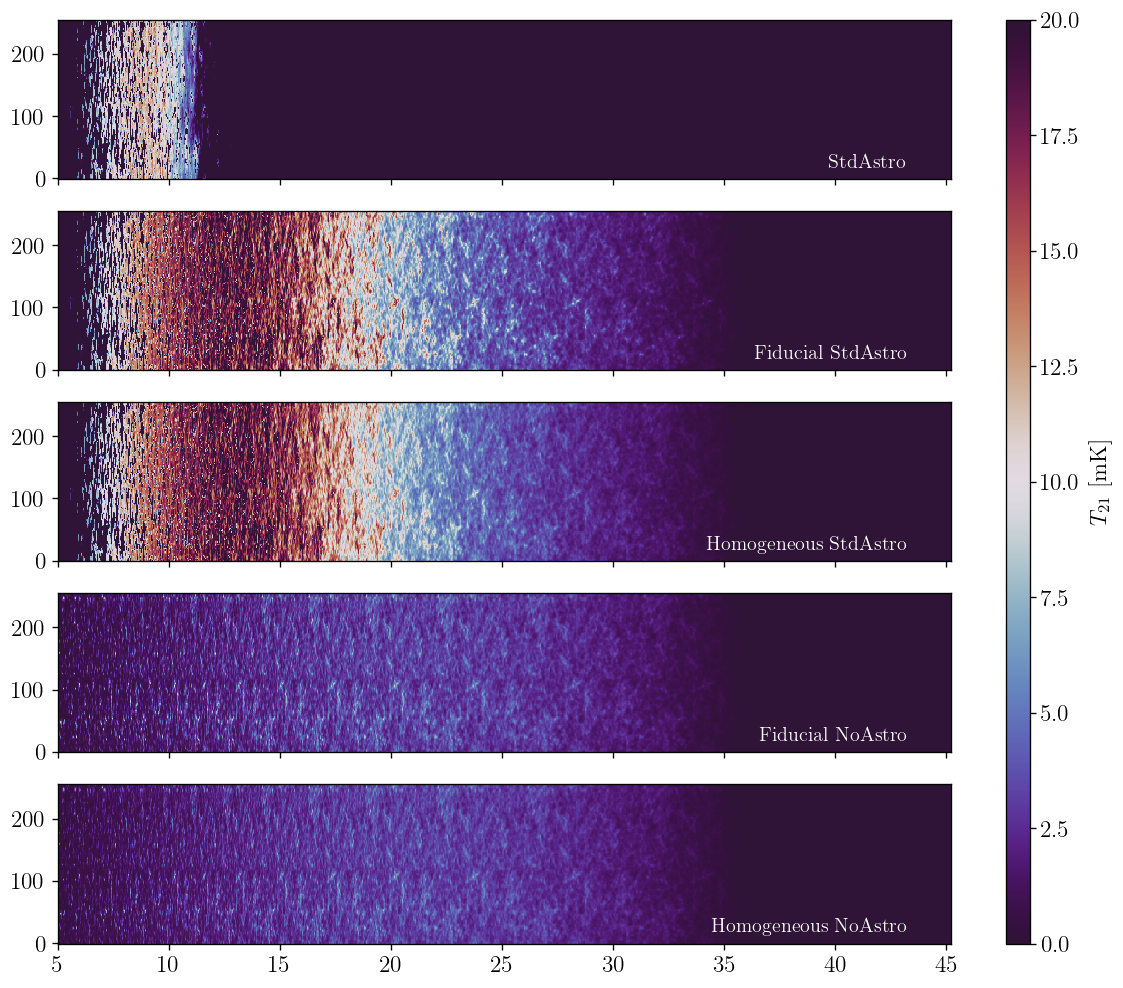

In [29]:
z_s = lc_fid.lightcone_redshifts
x_s = np.arange(128) * 2
vmin, vmax = 0, 20

fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

ax = axs[0]
ax.pcolormesh(z_s, x_s, lc_noinj.lightcones['brightness_temp'][:,0,:], vmin=vmin, vmax=vmax, cmap=cms['twilight_shifted'])
ax.text(0.95, 0.05, "StdAstro", transform=ax.transAxes, ha='right', va='bottom', color='w')

ax = axs[1]
ax.pcolormesh(z_s, x_s, lc_fid.lightcones['brightness_temp'][:,0,:], vmin=vmin, vmax=vmax, cmap=cms['twilight_shifted'])
ax.text(0.95, 0.05, "Fiducial StdAstro", transform=ax.transAxes, ha='right', va='bottom', color='w')

ax = axs[2]
ax.pcolormesh(z_s, x_s, lc_hom.lightcones['brightness_temp'][:,0,:], vmin=vmin, vmax=vmax, cmap=cms['twilight_shifted'])
ax.text(0.95, 0.05, "Homogeneous StdAstro", transform=ax.transAxes, ha='right', va='bottom', color='w')

ax = axs[3]
ax.pcolormesh(z_s, x_s, lc_fid_na.lightcones['brightness_temp'][:,0,:], vmin=vmin, vmax=vmax, cmap=cms['twilight_shifted'])
ax.text(0.95, 0.05, "Fiducial NoAstro", transform=ax.transAxes, ha='right', va='bottom', color='w')

ax = axs[4]
im = ax.pcolormesh(z_s, x_s, lc_hom_na.lightcones['brightness_temp'][:,0,:], vmin=vmin, vmax=vmax, cmap=cms['twilight_shifted'])
ax.text(0.95, 0.05, "Homogeneous NoAstro", transform=ax.transAxes, ha='right', va='bottom', color='w')

fig.colorbar(im, ax=axs, label=r"$T_{21}$ [mK]", aspect=40)

In [20]:
import powerbox as pbox

In [22]:
def compute_power(
   box,
   length,
   n_psbins,
   log_bins=True,
   ignore_kperp_zero=True,
   ignore_kpar_zero=False,
   ignore_k_zero=False,
):
    # Determine the weighting function required from ignoring k's.
    k_weights = np.ones(box.shape, int)
    n0 = k_weights.shape[0]
    n1 = k_weights.shape[-1]

    if ignore_kperp_zero:
        k_weights[n0 // 2, n0 // 2, :] = 0
    if ignore_kpar_zero:
        k_weights[:, :, n1 // 2] = 0
    if ignore_k_zero:
        k_weights[n0 // 2, n0 // 2, n1 // 2] = 0

    res = pbox.tools.get_power(
        box,
        boxlength=length,
        bins=n_psbins,
        bin_ave=False,
        get_variance=False,
        log_bins=log_bins,
        k_weights=k_weights,
    )

    res = list(res)
    k = res[1]
    if log_bins:
        k = np.exp((np.log(k[1:]) + np.log(k[:-1])) / 2)
    else:
        k = (k[1:] + k[:-1]) / 2

    res[1] = k
    return res

BOX_LEN = 256 # [Mpc]

def powerspectra(lc, z_start, z_end, n_psbins=30, logk=True):
    lightcone_redshifts = lc.lightcone_redshifts
    i_start = np.argmin(np.abs(lightcone_redshifts - z_start))
    i_end = np.argmin(np.abs(lightcone_redshifts - z_end))

    chunklen = (i_end - i_start) * lc.cell_size

    power, k = compute_power(
        lc.brightness_temp[:, :, i_start:i_end],
        (BOX_LEN, BOX_LEN, chunklen),
        n_psbins,
        log_bins=logk,
    )
    return {
        "k": k,
        "delta": power * k ** 3 / (2 * np.pi ** 2)
    }

In [23]:
lc_s = [lc_noinj, lc_fid, lc_hom, lc_fid_na, lc_hom_na]
ps_s_s = []
for z in tqdm([10, 15, 20, 25]):
    ps_s_s.append([powerspectra(lc, z, z+5) for lc in lc_s])

  0%|          | 0/4 [00:00<?, ?it/s]/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
100%|██████████| 4/4 [02:39<00:00, 39.94s/it]


In [24]:
labels = ["StdAstro", "Fiducial StdAstro", "Homogeneous StdAstro", "Fiducial NoAstro", "Homogeneous NoAstro"]

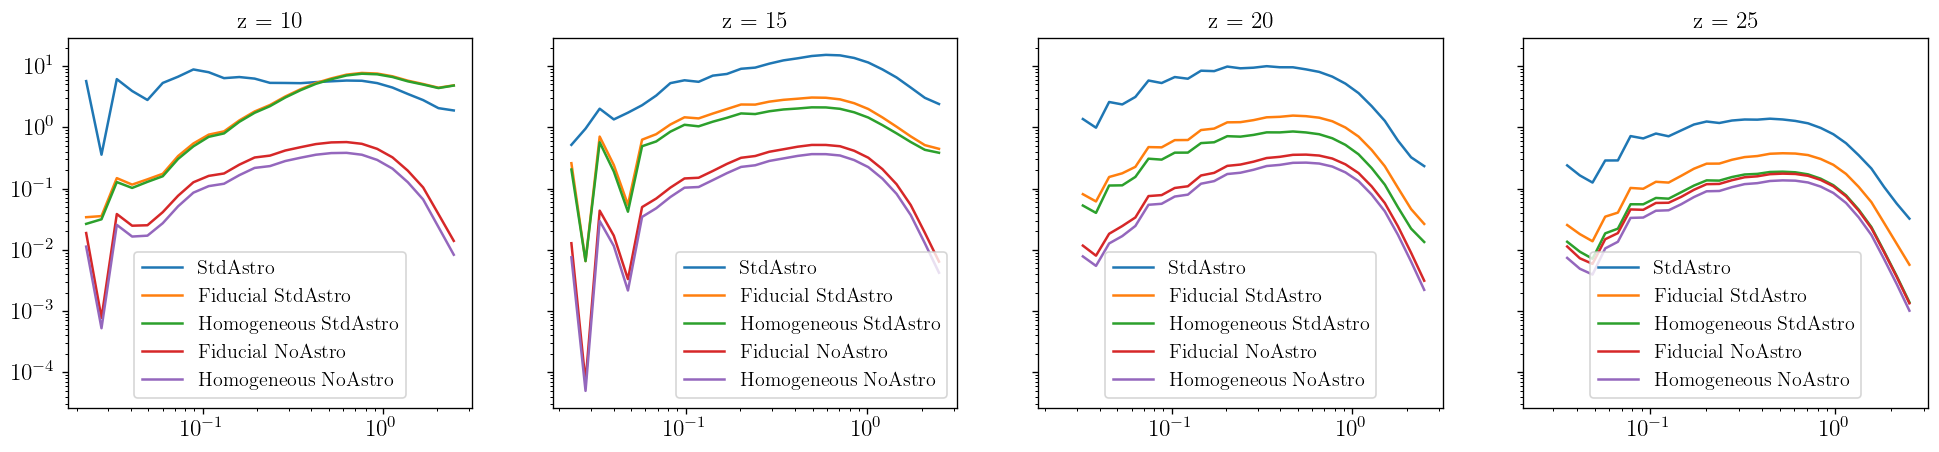

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, (ax, ps_s) in enumerate(zip(axs, ps_s_s)):
    for j, ps in enumerate(ps_s):
        ax.plot(ps['k'], ps['delta'], label=labels[j])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"z = {10 + i * 5}")
    ax.legend()